Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [53]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

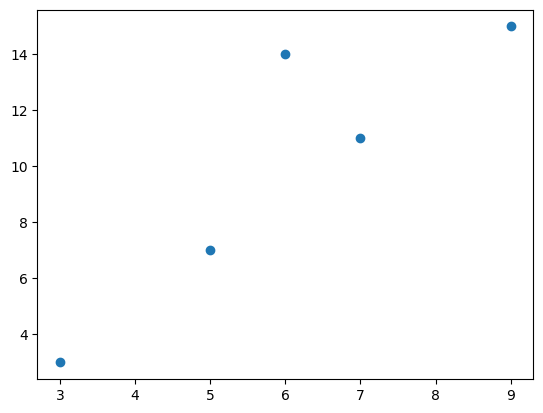

In [55]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [56]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [57]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


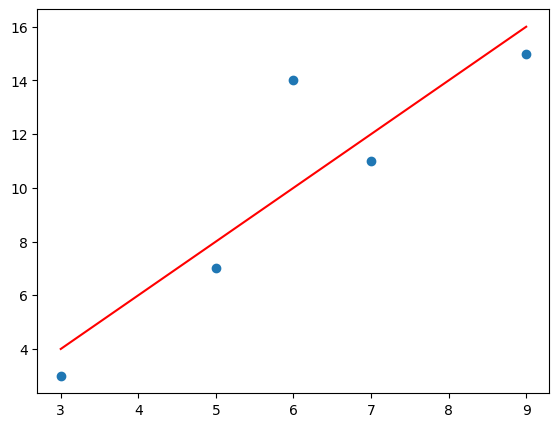

In [58]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [59]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [60]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


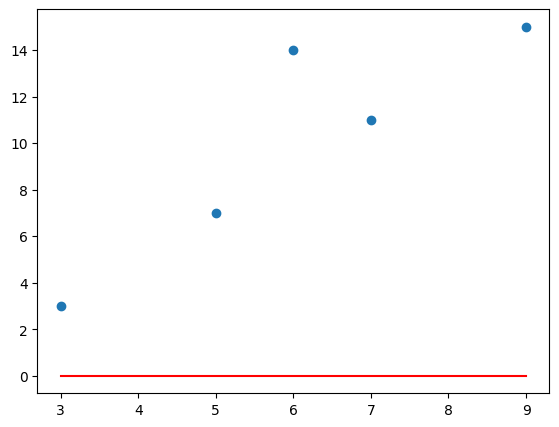

In [61]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


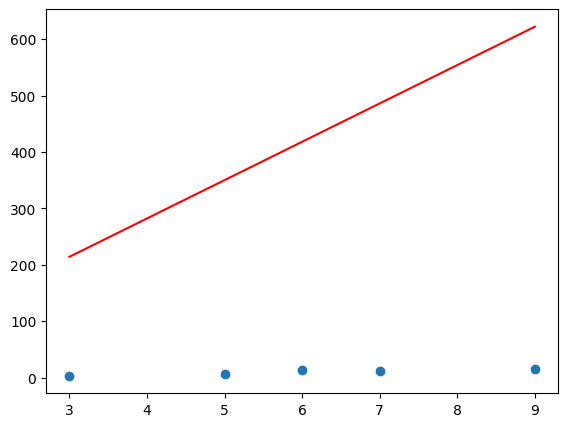

In [62]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [63]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [64]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


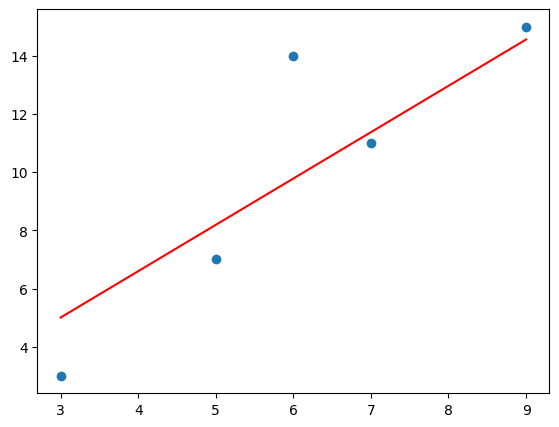

In [65]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

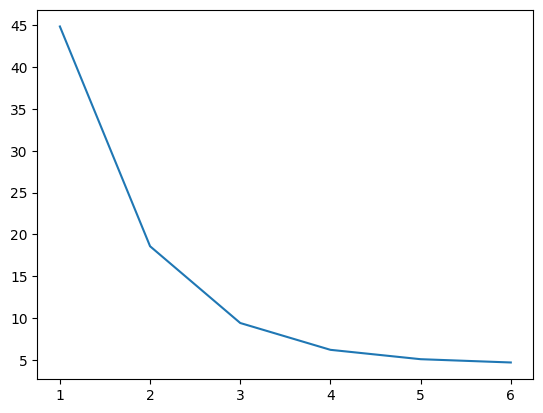

In [66]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [67]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.000028517306817


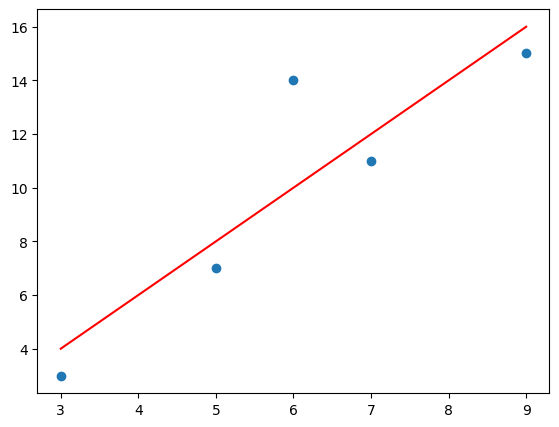

In [68]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

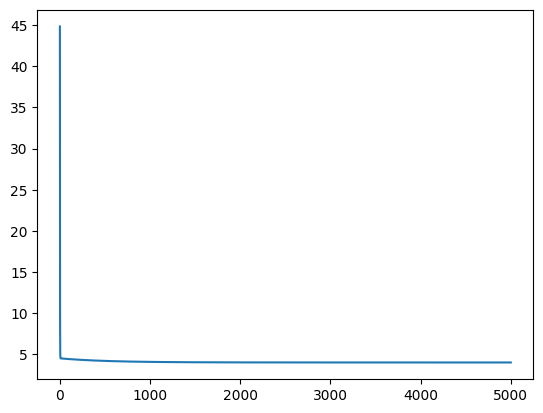

In [69]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


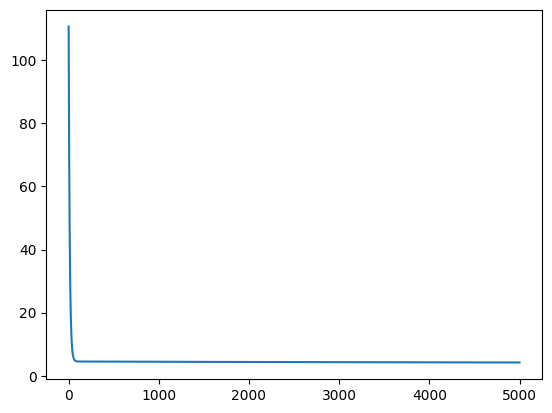

In [70]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Video Games.csv (с помощью pd.read_csv).

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, платформа, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);
Year_of_Release — год выпуска;
Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);
Publisher — издатель;
NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);
EU_Sales — объемы продаж игры в Европе(в млн долл. США);
Other_Sales — объемы продаж игры в других регионах (в млн долл. США);
Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;
Critic_Count — количество штатных критиков, давших оценки игре;
User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;
User_Count — количество пользователей, давших оценки;
Developer — разработчик;
Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);
JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии.

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

Вычислите определитель матрицы (x_T*x).

Вычислите вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является двумерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegression.fit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

Попробуйте расширить набор факторных признаков, добавив логарифмы, квадраты, кубы

In [71]:
from sklearn.preprocessing import OneHotEncoder
videogames = pd.read_csv(r"Video_Games.csv", index_col = 'id')
videogames.head()


,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
id,,,,,,,,
2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12


In [72]:
Y = videogames['jp_sales']

x = videogames.drop('jp_sales', axis=1)

x = pd.concat([x, pd.get_dummies(x['platform'], drop_first=True, dtype=int), pd.get_dummies(x['genre'], drop_first=True, dtype=int), pd.get_dummies(x['publisher'], drop_first=True, dtype=int)], axis = 1)
x = x.drop(['platform', 'genre', 'publisher'], axis = 1)
Y.head()


id
2830    1.01
3865    1.31
4617    1.04
3675    1.08
1612    1.12
Name: jp_sales, dtype: float64

In [73]:
x.head()

,year,na_sales,eu_sales,other_sales,3DS,DC,DS,GB,GBA,GC,...,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zushi Games,dramatic create,imageepoch Inc.
id,,,,,,,,,,,,,,,,,,,,,
2830,2012,0.38,0.52,0.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,1996,0.00,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4617,2009,0.09,0.00,0.01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3675,2007,0.00,0.00,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,2016,0.00,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
x_ = x
x_.insert(0, "intercept", np.ones((x.shape[0],1)), allow_duplicates=True)

In [75]:
x.shape

(4258, 313)

In [76]:
#Вычислим определитель (x_T*x).
np_opred = np.linalg.det(np.dot(x.T, x))
np_opred

3.144392573532325e+225

In [77]:
#Вычислим вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.
a = np.linalg.inv(np.dot(x.T, x)).dot(x.T).dot(Y)

In [78]:
a.shape

(313,)

In [79]:
y_test = x.dot(a)
y_test

id
2830    0.987727
3865    1.860408
4617    1.056777
3675    1.114558
1612    1.047659
          ...   
3996    1.040492
5720    1.640271
4579    1.010803
4072    1.675444
5883    1.456819
Length: 4258, dtype: float64

In [80]:
#Реализуем метод градиентного спуска в модеоли множественной регрессии
class MultipleRegression():
    def __init__(self, len_inputs):
        self.weights = np.zeros(len_inputs)
    def predict(self, x):
        if self.weights is None:
            raise Exception("Model has not been trained yet.")
        return x @ self.weights
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAPE(self, x, Y):
        return (abs((Y - self.predict(x)) / Y)).mean()
    def MAE(self, X, Y):
        return abs(Y - self.predict(X)).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000, error='MSE'):
        steps = []
        errors = []
        step = 0

        #fit with gradient boosting
        for i in range(max_steps):
          errors.append(self.MSE(x, Y))
          if errors[-1] < epsylon:
            break
          grad = -2 / len(x) * (Y - self.predict(x)) @ x
          self.weights = self.weights - alpha * grad
          step = step + 1
          steps.append(step)
        return steps, errors

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8, random_state=42)

In [83]:
model = MultipleRegression(X_train.shape[1])

In [84]:
print(X_train.shape)
print(model.weights.shape)
print(y_train.shape)

(3406, 313)
(313,)
(3406,)


In [85]:
#fit with MSE
steps, errors = model.fit(X_train, y_train, 0.0001, 0.0001, 2000)

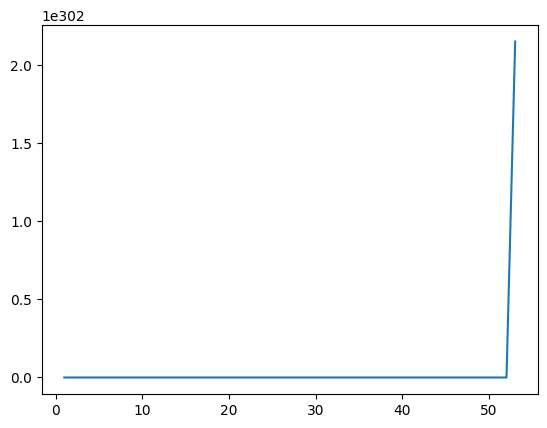

In [86]:
plt.figure()
plt.plot(steps, errors)

In [87]:
y_pred = model.predict(X_test)

In [88]:

y_test.shape

(852,)

In [89]:
y_pred.shape
y_pred.head(45)

id
6055   NaN
557    NaN
761    NaN
527    NaN
4253   NaN
5987   NaN
456    NaN
1048   NaN
4254   NaN
1030   NaN
3915   NaN
3174   NaN
2281   NaN
4822   NaN
5046   NaN
4604   NaN
2616   NaN
701    NaN
5488   NaN
4362   NaN
2437   NaN
2959   NaN
2659   NaN
4505   NaN
780    NaN
3294   NaN
2125   NaN
2754   NaN
4233   NaN
3968   NaN
1316   NaN
5312   NaN
3664   NaN
5093   NaN
1730   NaN
3201   NaN
2740   NaN
1772   NaN
5930   NaN
3175   NaN
3901   NaN
584    NaN
5753   NaN
150    NaN
77     NaN
dtype: float64

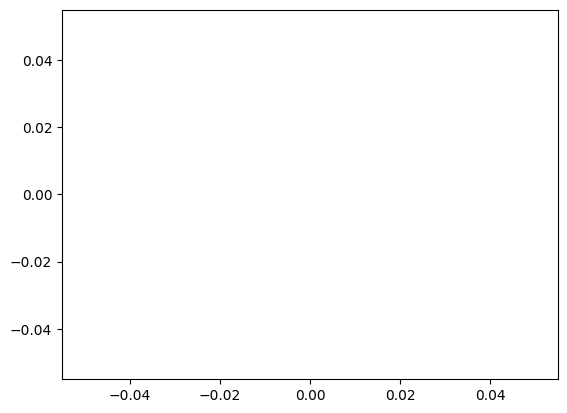

In [90]:
plt.figure()
plt.scatter(y_test, y_pred)

In [91]:
print(f'MSE: {model.MSE(X_test, y_test)}')

MSE: nan


In [92]:
print(f'MAE: {model.MAE(X_test, y_test)}')

MAE: nan


In [93]:
print(f'MAPE: {model.MAPE(X_test, y_test)}')

MAPE: nan


In [94]:
x['na_sales_logs'] = np.log(1 + x['na_sales'])
x['eu_sales_logs'] = np.log(1 + x['eu_sales'])
x['other_sales_logs'] = np.log(1 + x['other_sales'])

In [95]:
x.head()

,intercept,year,na_sales,eu_sales,other_sales,3DS,DC,DS,GB,GBA,...,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zushi Games,dramatic create,imageepoch Inc.,na_sales_logs,eu_sales_logs,other_sales_logs
id,,,,,,,,,,,,,,,,,,,,,
2830,1.0,2012,0.38,0.52,0.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0.322083,0.41871,0.223144
3865,1.0,1996,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.00000,0.000000
4617,1.0,2009,0.09,0.00,0.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0.086178,0.00000,0.009950
3675,1.0,2007,0.00,0.00,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0.000000,0.00000,0.000000
1612,1.0,2016,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.00000,0.000000


In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8, random_state=42)

In [97]:
model_with_logs = MultipleRegression(X_train.shape[1])
steps, errors = model_with_logs.fit(X_train, np.log(y_train), 0.0000001, 0.0001, 2000)

In [98]:
y_pred = model_with_logs.predict(X_test)
print(f'MSE: {model_with_logs.MSE(X_test, np.log(y_test))}')
print(f'MAE: {model_with_logs.MAE(X_test, np.log(y_test))}')
print(f'MAPE: {model_with_logs.MAPE(X_test, np.log(y_test))}')

MSE: 0.05832308315871011
MAE: 0.147138188451366
MAPE: 3.5936444633591593


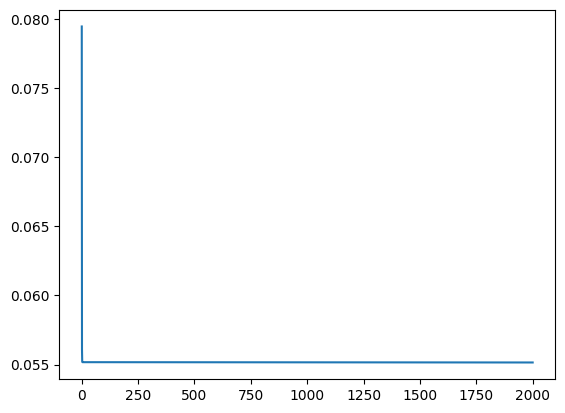

In [99]:
plt.figure()
plt.plot(steps, errors)

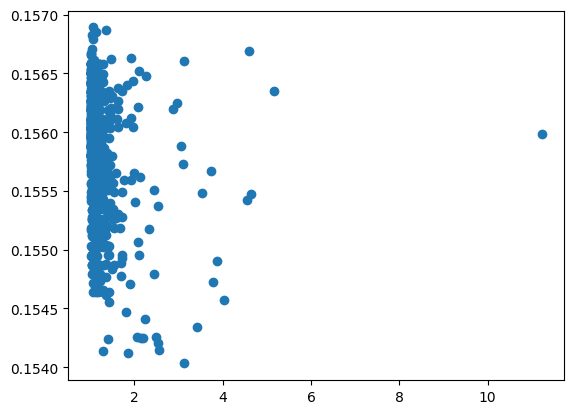

In [100]:
plt.figure()
plt.scatter(y_test, y_pred)

In [101]:
x = x.drop(['na_sales_logs', 'eu_sales_logs', 'other_sales_logs'], axis=1)
x['na_sales_quads'] = x['na_sales'] ** 2
x['eu_sales_quads'] = x['eu_sales'] ** 2
x['other_sales_quads'] = x['other_sales'] ** 2

X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8, random_state=42)
model_with_quads = MultipleRegression(X_train.shape[1])
steps, errors = model_with_quads.fit(X_train, y_train, 0.0000001, 0.0001, 700)


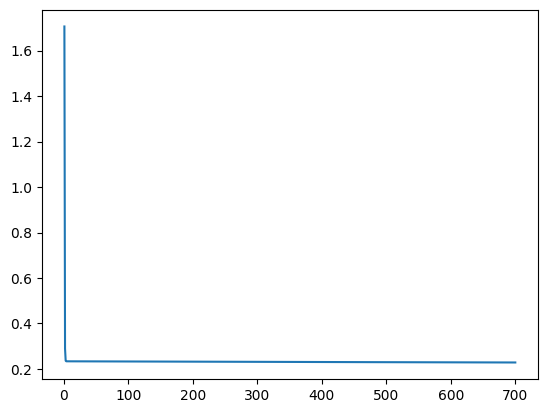

In [102]:
plt.figure()
plt.plot(steps, errors)

In [103]:
y_pred = model_with_quads.predict(X_test)
print(f'MSE: {model_with_quads.MSE(X_test, np.log(y_test))}')
print(f'MAE: {model_with_quads.MAE(X_test, np.log(y_test))}')
print(f'MAPE: {model_with_quads.MAPE(X_test, np.log(y_test))}')

MSE: 1.1835586918505616
MAE: 1.0679464393178149
MAPE: 32.79810375970918


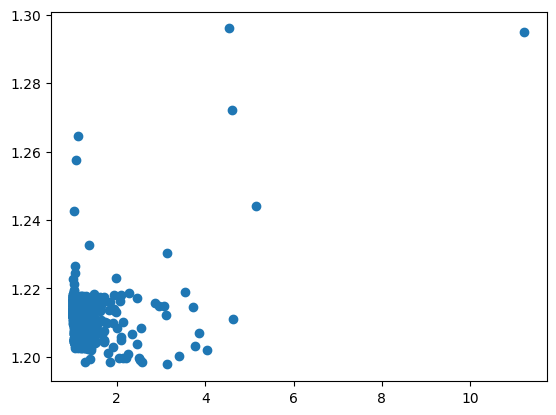

In [104]:
plt.figure()
plt.scatter(y_test, y_pred)

In [105]:
x = x.drop(['na_sales_quads', 'eu_sales_quads', 'other_sales_quads'], axis=1)
x['na_sales_kub'] = x['na_sales'] ** 3
x['eu_sales_kub'] = x['eu_sales'] ** 3
x['other_sales_kub'] = x['other_sales'] ** 3

X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8, random_state=42)
model_with_kub = MultipleRegression(X_train.shape[1])
steps, errors = model_with_kub.fit(X_train, y_train, 0.0000001, 0.0001, 1000)

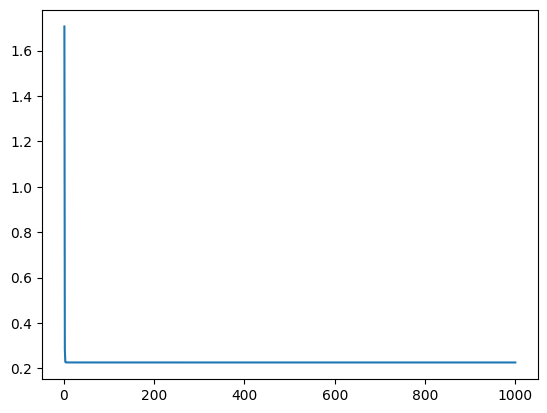

In [106]:
plt.figure()
plt.plot(steps, errors)

In [107]:
y_pred = model_with_kub.predict(X_test)
print(f'MSE: {model_with_kub.MSE(X_test, np.log(y_test))}')
print(f'MAE: {model_with_kub.MAE(X_test, np.log(y_test))}')
print(f'MAPE: {model_with_kub.MAPE(X_test, np.log(y_test))}')

MSE: 1.1804079138403865
MAE: 1.066480680124991
MAPE: 32.7564754325597


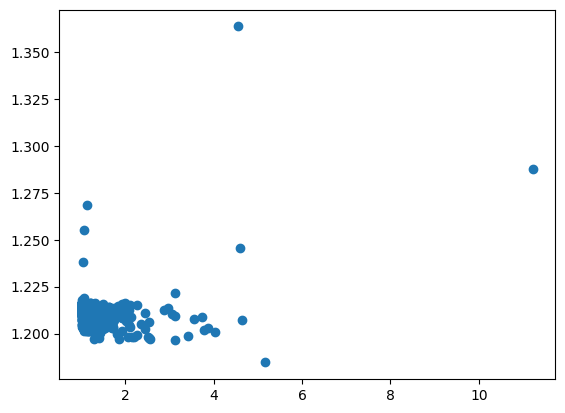

In [108]:
plt.figure()
plt.scatter(y_test, y_pred)